# AAG02 Tarefa em Dupla

- **Objetivo**: Utilizar Spidering/Scraping ou Logging para coletar dados a serem passados como parâmetro para uma das funções feitas na AAG01. Em outras palavras, os dados coletados deverão ser “limpados” e passados como parâmetro para a geração de uma **CDF** ou **PMF**.

## Regras:
1. Deve ser feito obrigatoriamente no **Jupyter Notebook**.
2. Utilizar *Markdowns* com comandos LaTeX para documentar o código e explicar os resultados.
3. Deve ser entregue nos formatos **.pdf** e **.ipynb** (código fonte + markdowns).
4. Os **dados brutos** obtidos por *spidering/scraping* ou *logging* devem ser salvos separadamente do **dado tratado**, caso alguma limpeza tenha que ser realizada.
5. Os dados devem ser entregues em anexo.


## Baixando os dados

Escolhi baixar dados de teste do site *http://books.toscrape.com/*, que está disponível para scraping.  
Vou coletar os títulos dos livros e os preços de venda. Para efeitos de teste, baixarei somente as 3 primeiras páginas.

Os livros estão dentro da tag `article` com a classe `product_pod`.

Os títulos são os únicos elementos dentro das tags `<h3>`.

Os preços estão na classe `price_color`, dentro de uma tag `<p>`.

Os dados serão gravados em um arquivo chamado ***books.csv***.


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# URL base do site
base_url = "http://books.toscrape.com/catalogue/page-{}.html"

# Listas para armazenar os dados coletados
titles = []
prices = []

# Loop pelas 3 primeiras páginas
for page in range(1, 4):  # Páginas 1, 2 e 3
    # Construindo a URL da página atual
    url = base_url.format(page)
    print(f"Acessando: {url}")
    
    # Fazendo a requisição HTTP
    response = requests.get(url)
    
    # Verificando se a requisição foi bem-sucedida
    if response.status_code == 200:
        # Parseando o HTML com BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Localizando os elementos HTML correspondentes aos livros
        books = soup.find_all("article", class_="product_pod")
        for book in books:
            # Extraindo o título
            title = book.h3.a["title"]
            titles.append(title)
            
            # Extraindo o preço
            price = book.find("p", class_="price_color").text
            prices.append(price)
    else:
        print(f"Erro ao acessar a página {page}: {response.status_code}")

# Criando um DataFrame com os dados coletados
data = pd.DataFrame({
    "Title": titles,
    "Price": prices
})

# Salvando os dados em um arquivo CSV
data.to_csv("books.csv", index=False)
print("Dados coletados e salvos com sucesso!")


Acessando: http://books.toscrape.com/catalogue/page-1.html
Acessando: http://books.toscrape.com/catalogue/page-2.html
Acessando: http://books.toscrape.com/catalogue/page-3.html
Dados coletados e salvos com sucesso!


In [17]:
data.head()

,Title,Price
0,A Light in the Attic,£51.77
1,Tipping the Velvet,£53.74
2,Soumission,£50.10
3,Sharp Objects,£47.82
4,Sapiens: A Brief History of Humankind,£54.23


## Limpando os dados
Preciso retirar o simbolo de moeda e transformar em número os preços

In [18]:
# Limpando os preços (removendo o símbolo £ e convertendo para float)
data["Price"] = data["Price"].str.replace("£", "").astype(float)

## Gerando as funções PDF e CDF dos preços

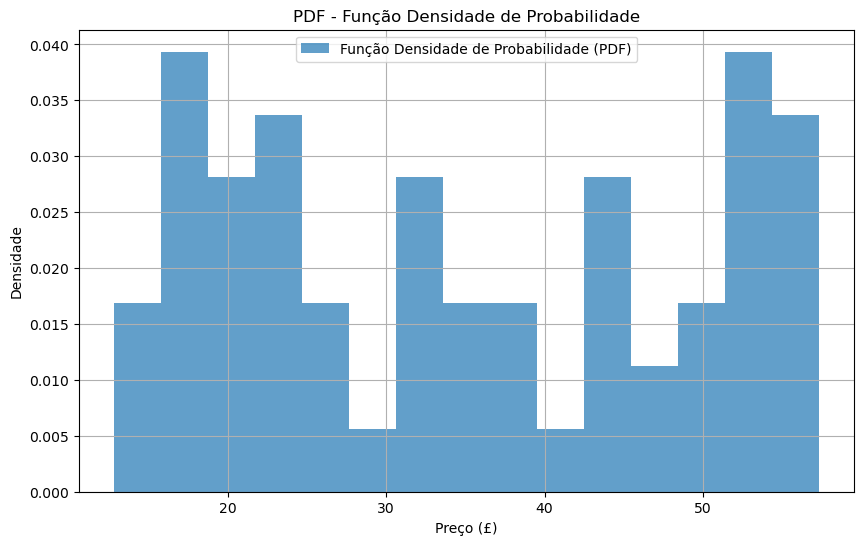

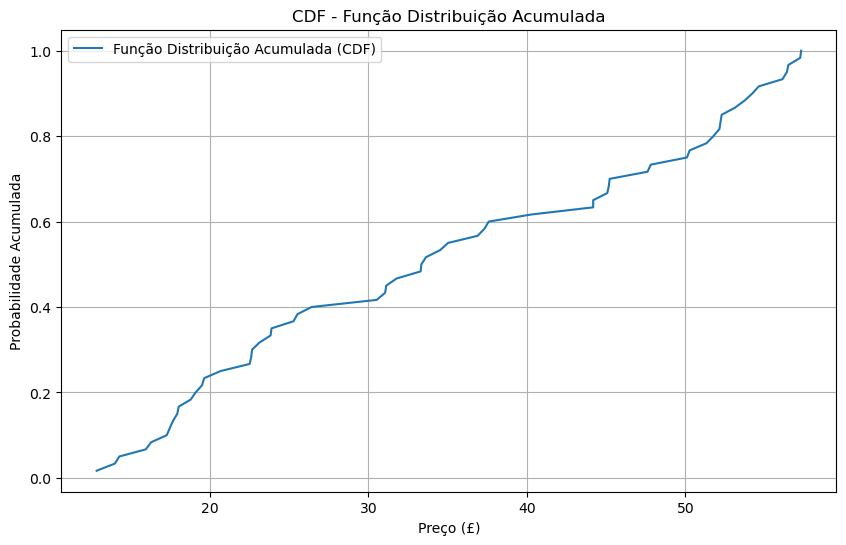

In [23]:
# Ordenar os dados de preços para a CDF
prices_sorted = np.sort(data['Price'])

# Gerar a PDF (histograma normalizado)
plt.figure(figsize=(10, 6))
plt.hist(data['Price'], bins=15, density=True, alpha=0.7, \
    label="Função Densidade de Probabilidade (PDF)")
plt.title("PDF - Função Densidade de Probabilidade")
plt.xlabel("Preço (£)")
plt.ylabel("Densidade")
plt.legend()
plt.grid(True)
plt.show()

# Gerar a CDF
cdf = np.cumsum(np.ones_like(prices_sorted) / len(prices_sorted))

plt.figure(figsize=(10, 6))
plt.plot(prices_sorted, cdf, label="Função Distribuição Acumulada (CDF)", linestyle='-')
plt.title("CDF - Função Distribuição Acumulada")
plt.xlabel("Preço (£)")
plt.ylabel("Probabilidade Acumulada")
plt.legend()
plt.grid(True)
plt.show()

## Gravando o arquivo limpo

In [21]:
data.to_csv("books-limpo.csv", index=False)